In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [6]:
hotel=pd.read_csv("hotel_bookings.csv")

In [7]:
hotel.shape   #no of rows and columns

(119390, 32)

In [8]:
hotel.is_canceled.value_counts()  #value counts of target column

0    75166
1    44224
Name: is_canceled, dtype: int64

In [9]:
#hotel.info()

In [10]:
hotel.describe() #shows all the numerical columns in the data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
hotel.shape

(119390, 32)

# Treating Missing Values

In [12]:
hotel.isnull().sum()  #no of null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
# country
hotel.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [14]:
hotel.country=hotel.country.fillna("Not-Defined") #as don't know the country so filled with Not Defined

In [15]:
# agent
hotel.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [16]:
hotel.agent=hotel.agent.fillna(hotel.agent.median()) 
#As agent is numerical column so filled with median as median is less sensitive to outliers than mean

In [17]:
# company
hotel.drop(columns="company",inplace=True)  #it has more 50% null values

In [18]:
# children
hotel.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [19]:
hotel.children=hotel.children.fillna(0.0) #Dont know the no. of children so filled with 0

In [20]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 


# Dtype Conversion

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [23]:
#Hotel
hotel.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [24]:
hotel.hotel=le.fit_transform(hotel.hotel)

In [25]:
hotel.hotel.value_counts()

0    79330
1    40060
Name: hotel, dtype: int64

arrival_date_month

In [26]:
#arrival_date_month
hotel.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [27]:
hotel.arrival_date_month=le.fit_transform(hotel.arrival_date_month)

In [28]:
hotel.arrival_date_month.value_counts()

1     13877
5     12661
8     11791
10    11160
0     11089
6     10939
11    10508
7      9794
3      8068
9      6794
2      6780
4      5929
Name: arrival_date_month, dtype: int64

In [29]:
# meal
hotel.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [30]:
hotel.meal=le.fit_transform(hotel.meal)

In [31]:
hotel.meal.value_counts()

0    92310
2    14463
3    10650
4     1169
1      798
Name: meal, dtype: int64

In [32]:
# country
hotel.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [33]:
hotel.country=le.fit_transform(hotel.country)

In [34]:
hotel.country.value_counts()

136    48590
59     12129
56     10415
51      8568
43      7287
       ...  
44         1
27         1
70         1
173        1
119        1
Name: country, Length: 178, dtype: int64

In [35]:
# market_segment
hotel.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [36]:
hotel.market_segment=le.fit_transform(hotel.market_segment)

In [37]:
hotel.market_segment.value_counts()

6    56477
5    24219
4    19811
3    12606
2     5295
1      743
0      237
7        2
Name: market_segment, dtype: int64

In [38]:
# distribution_channel
hotel.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [39]:
hotel.distribution_channel=le.fit_transform(hotel.distribution_channel)

In [40]:
hotel.distribution_channel.value_counts()

3    97870
1    14645
0     6677
2      193
4        5
Name: distribution_channel, dtype: int64

In [41]:
# reserved_room_type
hotel.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [42]:
hotel.reserved_room_type=le.fit_transform(hotel.reserved_room_type)

In [43]:
hotel.reserved_room_type.value_counts()

0    85994
3    19201
4     6535
5     2897
6     2094
1     1118
2      932
7      601
9       12
8        6
Name: reserved_room_type, dtype: int64

In [44]:
# assigned_room_type
hotel.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [45]:
hotel.assigned_room_type=le.fit_transform(hotel.assigned_room_type)

In [46]:
hotel.assigned_room_type.value_counts()

0     74053
3     25322
4      7806
5      3751
6      2553
2      2375
1      2163
7       712
8       363
9       279
11       12
10        1
Name: assigned_room_type, dtype: int64

In [47]:
# deposit_type
hotel.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [48]:
hotel.deposit_type=le.fit_transform(hotel.deposit_type)

In [49]:
hotel.deposit_type.value_counts()

0    104641
1     14587
2       162
Name: deposit_type, dtype: int64

In [50]:
#customer_type.
hotel.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [51]:
hotel.customer_type=le.fit_transform(hotel.customer_type)

In [52]:
hotel.customer_type.value_counts()

2    89613
3    25124
0     4076
1      577
Name: customer_type, dtype: int64

In [53]:
#reservation_status
hotel.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [54]:
hotel.reservation_status=le.fit_transform(hotel.reservation_status)

In [55]:
hotel.reservation_status.value_counts()

1    75166
0    43017
2     1207
Name: reservation_status, dtype: int64

In [56]:
# reservation_status_dat
hotel.reservation_status_date.value_counts()

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64

In [57]:
hotel.reservation_status_date=le.fit_transform(hotel.reservation_status_date)                                      

In [58]:
hotel.reservation_status_date.value_counts()

233    1461
126     805
634     790
2       763
322     625
       ... 
25        1
64        1
32        1
106       1
17        1
Name: reservation_status_date, Length: 926, dtype: int64

In [59]:
hotel.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
country                             int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
booking_changes                     int64
deposit_type                        int64
agent                             

# Data Visualization

<Axes: xlabel='hotel', ylabel='count'>

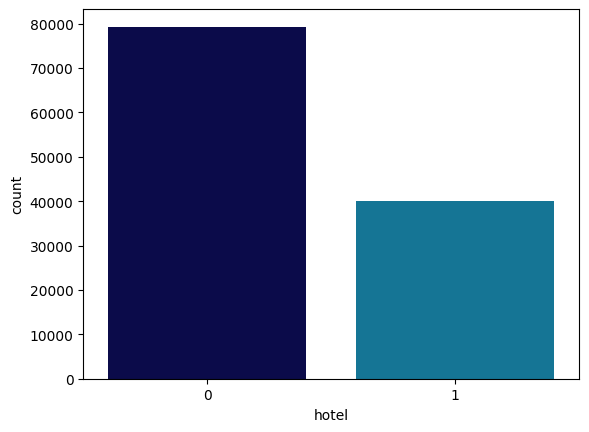

In [60]:
sns.countplot(data=hotel,x="hotel",palette="ocean")  # city hotel has more bookings than resort hotel

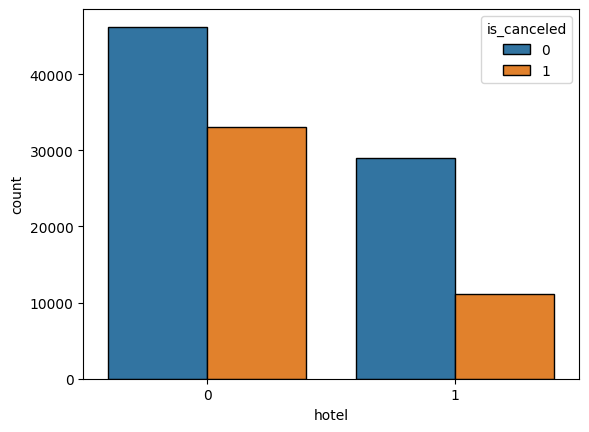

In [61]:
#Which Hotel has more camcelled booking   (0-City Hotel, 1-Resort Hotel)
sns.countplot(x="hotel",data=hotel,hue="is_canceled",edgecolor="black")
plt.show()                                            #1=canceled 0= not canceled

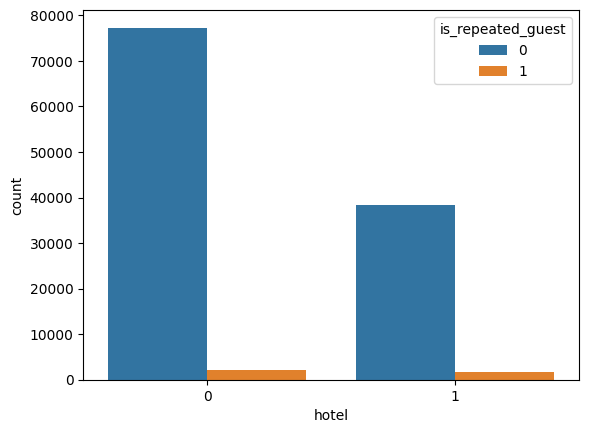

In [62]:
sns.countplot(data=hotel,x="hotel",hue="is_repeated_guest")  #0=not repeated 1= repeated
plt.show()

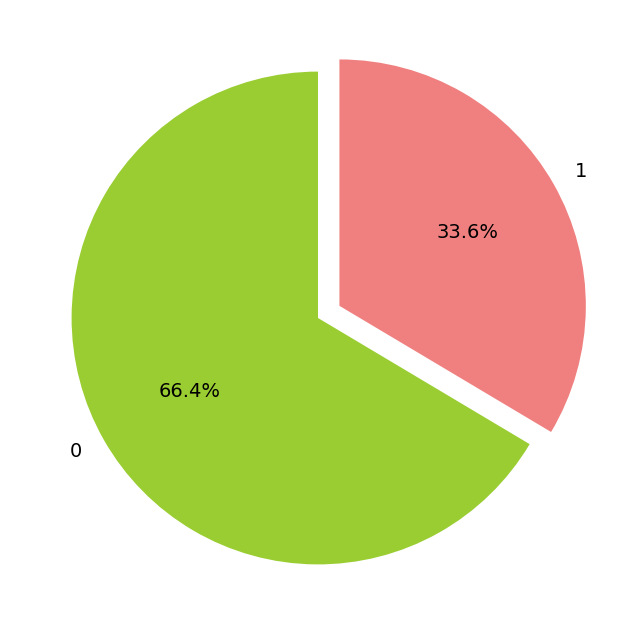

In [63]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()


<Axes: >

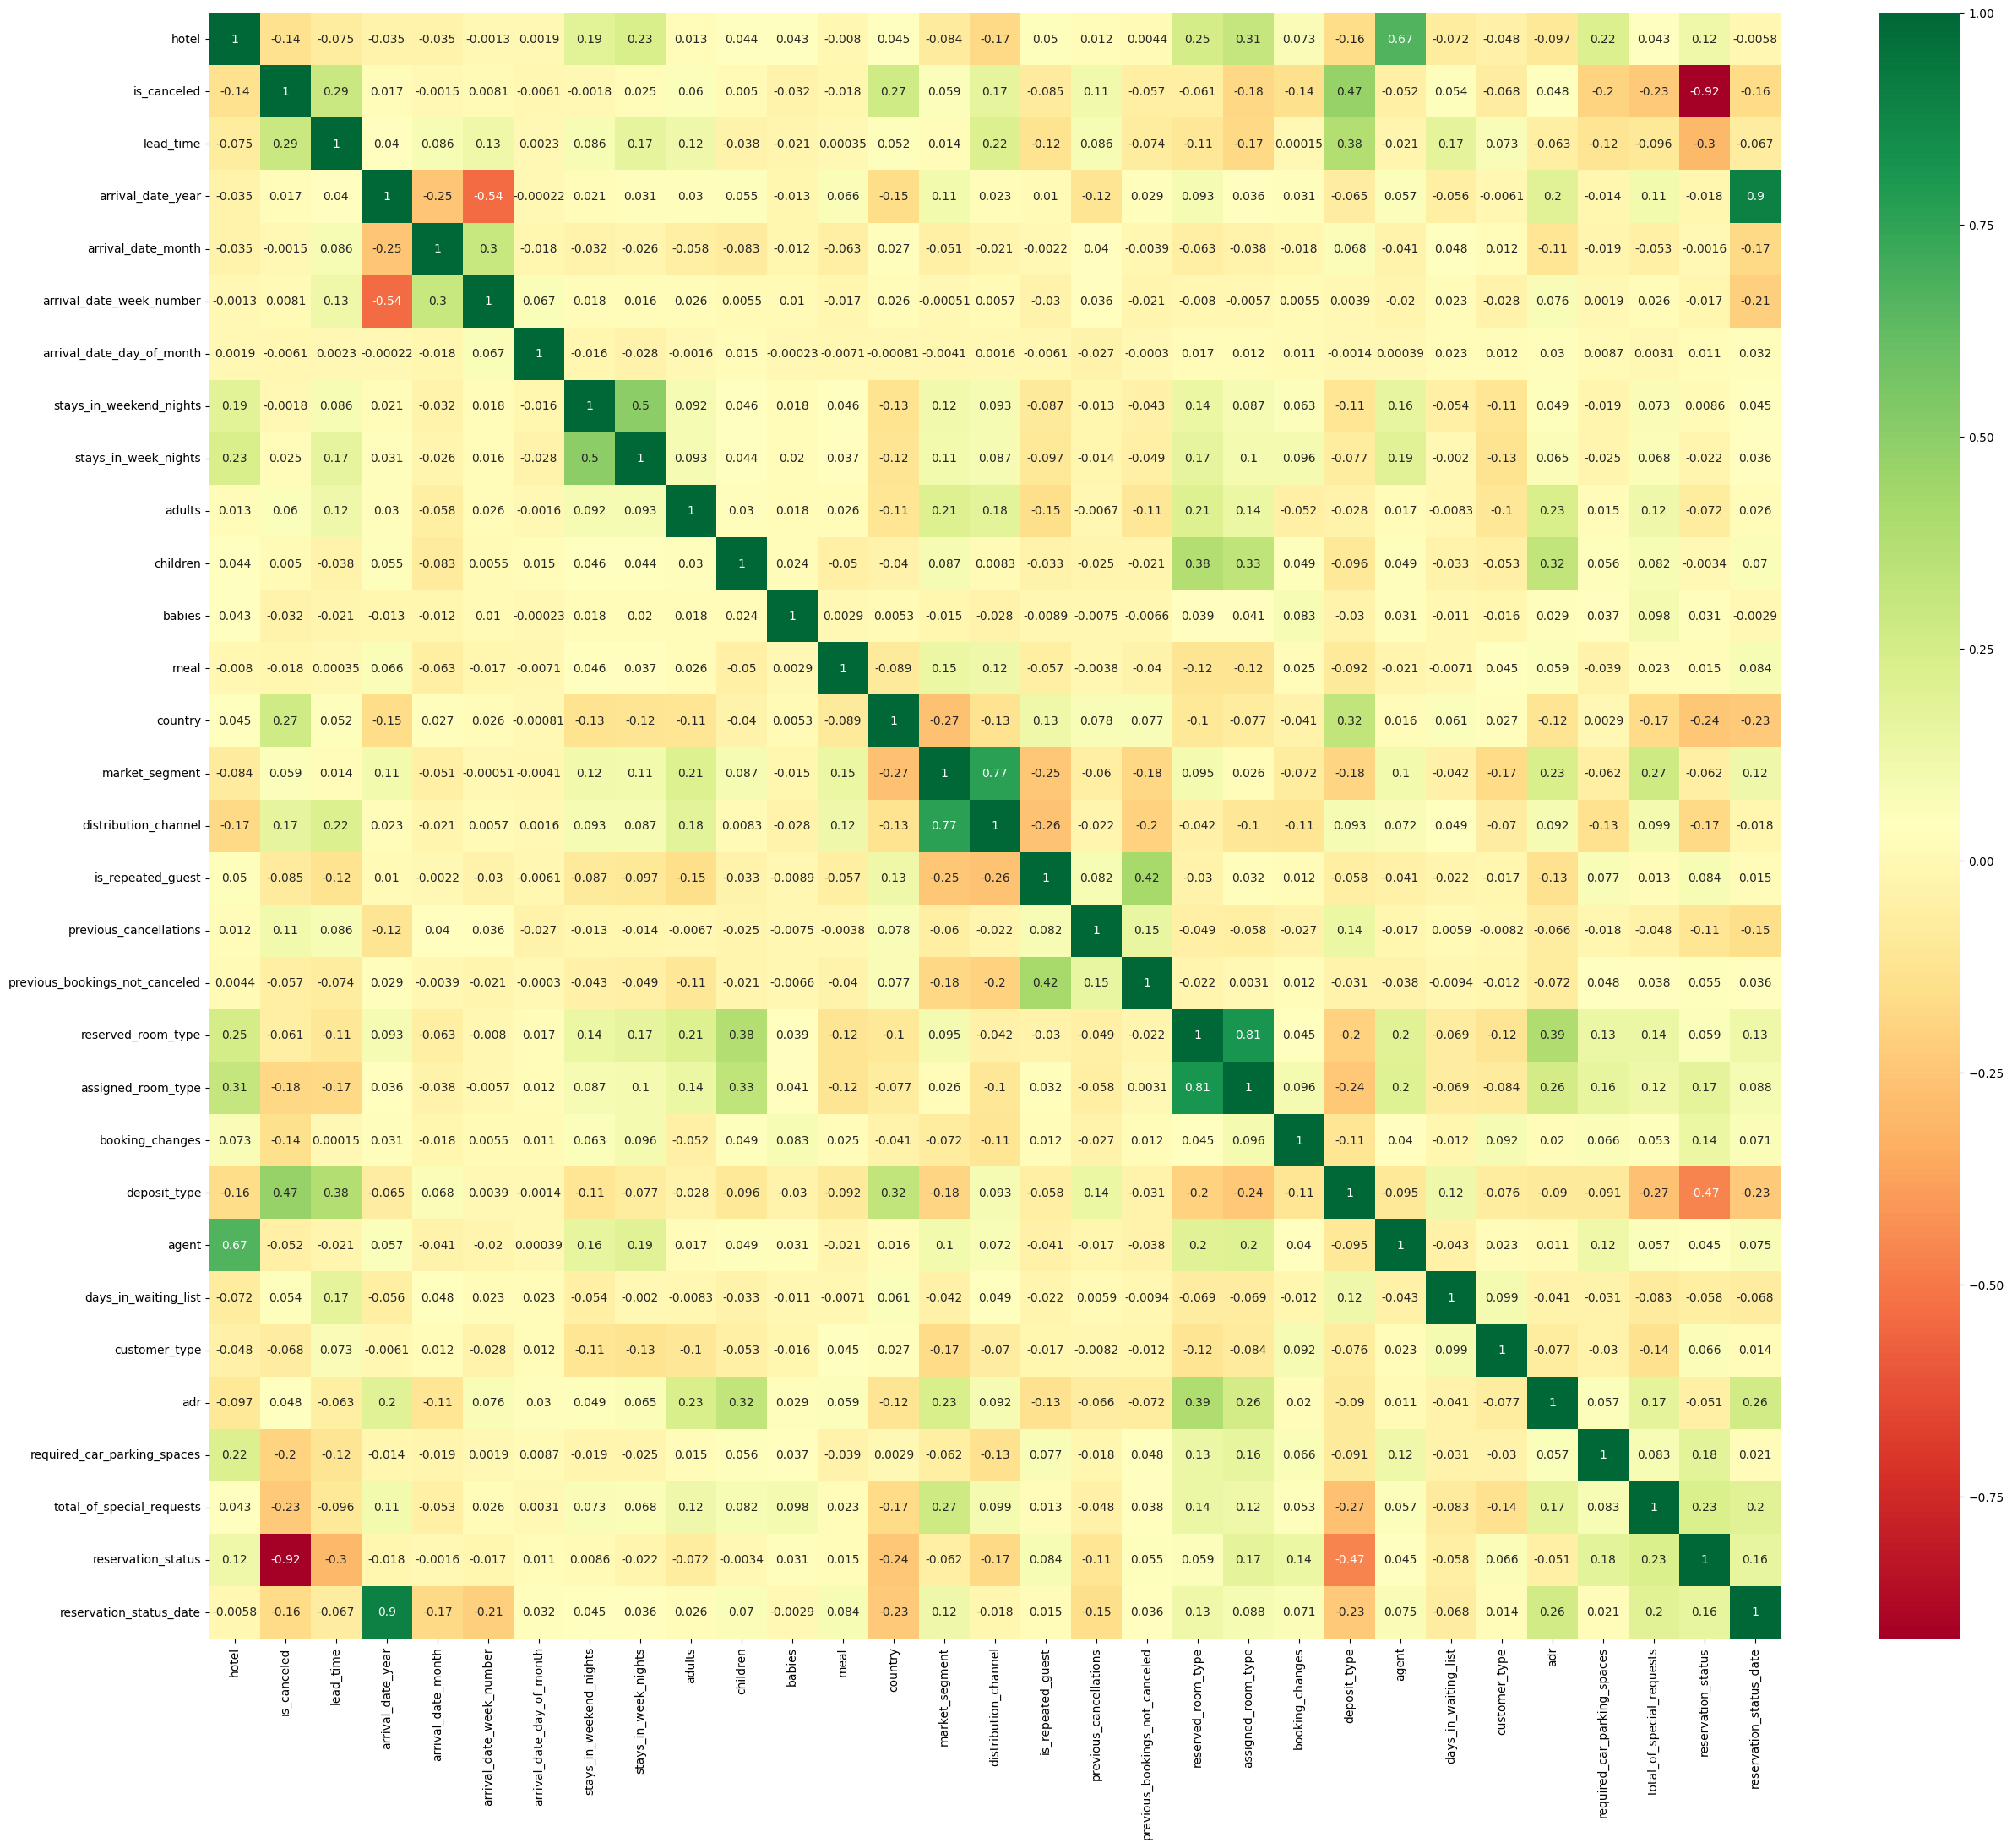

In [65]:
plt.figure(figsize=(30,25))
sns.heatmap(hotel.corr(),annot=True,cmap='RdYlGn')

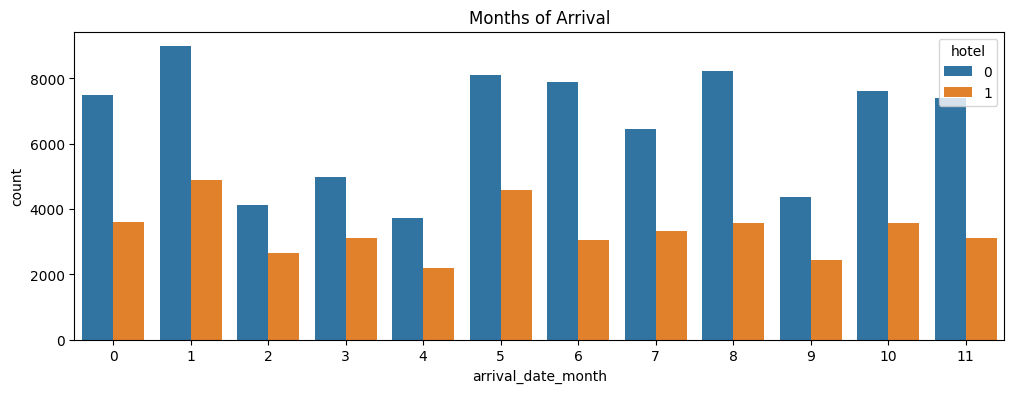

In [66]:
#Plotting the months against hotel type 
plt.figure(figsize=(12,4))    #0=City hotel ,1=resort hotel
sns.countplot(x='arrival_date_month', hue = 'hotel', data=hotel)
plt.title('Months of Arrival')
plt.show()

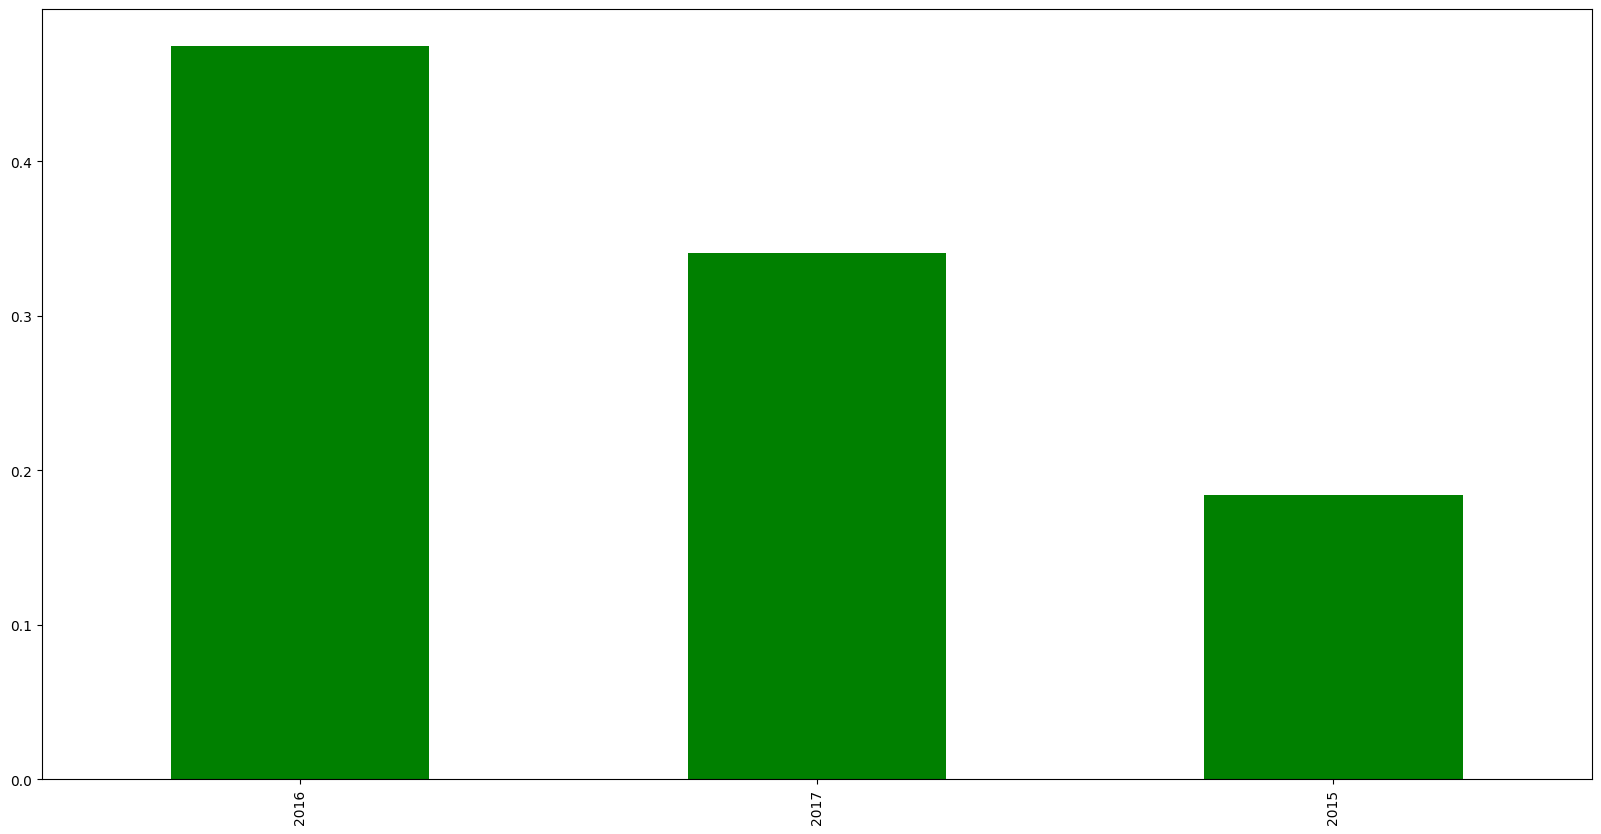

In [67]:
#the year in which most booked hotel
plt.figure(figsize=(20,10))
hotel.arrival_date_year.value_counts(normalize=True).plot(kind="bar",color='g')
plt.show()

# Model Building without treating outliers


In [68]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,14.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,14.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,14.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,123


In [69]:
can=hotel["is_canceled"] # saving target column in variable

In [70]:
hotel=hotel.drop(["is_canceled"],axis=1) #droping the target column 

In [71]:
h_n=pd.concat([hotel,can],axis=1)  
h_n.head(2)                        

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
0,1,342,2015,5,27,1,0,0,2,0.0,...,0,14.0,0,2,0.0,0,0,1,121,0
1,1,737,2015,5,27,1,0,0,2,0.0,...,0,14.0,0,2,0.0,0,0,1,121,0


In [72]:
# saperating dependant and independant columns
x=h_n.iloc[:,:-1]
y=h_n.iloc[:,-1]

In [73]:
x.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,342,2015,5,27,1,0,0,2,0.0,...,3,0,14.0,0,2,0.0,0,0,1,121
1,1,737,2015,5,27,1,0,0,2,0.0,...,4,0,14.0,0,2,0.0,0,0,1,121


In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [75]:
 from sklearn.model_selection import train_test_split

In [76]:
# splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [77]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((95512, 30), (23878, 30), (95512,), (23878,))

# 1. Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [79]:
lg.fit(x_train,y_train)

LogisticRegression()

In [80]:
lg_p=lg.predict(x_test)
lg_p

array([0, 0, 0, ..., 0, 1, 1])

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [82]:
lg_c=confusion_matrix(lg_p,y_test)
lg_c

array([[13297,  2864],
       [ 1732,  5985]])

In [83]:
lg_ac=lg_c.diagonal().sum()/lg_c.sum()*100
lg_ac

80.75215679705168

In [84]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     16161
           1       0.68      0.78      0.72      7717

    accuracy                           0.81     23878
   macro avg       0.78      0.80      0.79     23878
weighted avg       0.82      0.81      0.81     23878



In [85]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [86]:
lg_f=f1_score(y_test, lg_p, average="macro")
lg_pr=precision_score(y_test,lg_p, average="macro")
lg_r=recall_score(y_test,lg_p, average="macro")

# 2. Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [88]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
dt_p=dt.predict(x_test)
dt_p

array([1, 0, 1, ..., 0, 1, 1])

In [90]:
dt_c=confusion_matrix(dt_p,y_test)
dt_c

array([[15029,     0],
       [    0,  8849]])

In [91]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

100.0

In [92]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15029
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [93]:
dt_f=f1_score(y_test, dt_p, average="macro")
dt_pr=precision_score(y_test,dt_p, average="macro")
dt_r=recall_score(y_test,dt_p, average="macro")

# 3. Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [95]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [96]:
rf_p=rf.predict(x_test)
rf_p

array([1, 0, 1, ..., 0, 1, 1])

In [97]:
rf_c=confusion_matrix(rf_p,y_test)
rf_c

array([[15029,     0],
       [    0,  8849]])

In [98]:
rf_ac=rf_c.diagonal().sum()/rf_c.sum()*100
rf_ac

100.0

In [99]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15029
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [100]:
rf_f=f1_score(y_test, rf_p, average="macro")
rf_pr=precision_score(y_test,rf_p, average="macro")
rf_r=recall_score(y_test,rf_p, average="macro")

# 4. Boosting
# 4.1 Ada Boost

In [101]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [102]:
ab=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=2)

In [103]:
ab.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=2)

In [104]:
ab_p=ab.predict(x_test)
ab_p

array([1, 0, 1, ..., 0, 1, 1])

In [105]:
ab_c=confusion_matrix(ab_p,y_test)
ab_c

array([[15029,     0],
       [    0,  8849]])

In [106]:
ab_ac=ab_c.diagonal().sum()/ab_c.sum()*100
ab_ac

100.0

In [107]:
print(classification_report(ab_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15029
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [108]:
ab_f=f1_score(y_test, ab_p, average="macro")
ab_pr=precision_score(y_test,ab_p, average="macro")
ab_r=recall_score(y_test,ab_p, average="macro")

# 4.2 XG Boost

In [109]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [110]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [111]:
xg_p=xg.predict(x_test)
xg_p

array([1, 0, 1, ..., 0, 1, 1])

In [112]:
xg_c=confusion_matrix(xg_p,y_test)
xg_c

array([[15029,     0],
       [    0,  8849]])

In [113]:
xg_ac=xg_c.diagonal().sum()/xg_c.sum()*100
xg_ac

100.0

In [114]:
print(classification_report(xg_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15029
           1       1.00      1.00      1.00      8849

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [115]:
xg_f=f1_score(y_test, xg_p, average="macro")
xg_pr=precision_score(y_test,xg_p, average="macro")
xg_r=recall_score(y_test,xg_p, average="macro")

# 5. SVM

In [116]:
from sklearn.svm import SVC
sv=SVC() 

In [117]:
sv.fit(x_train,y_train)

SVC()

In [118]:
sv_p=sv.predict(x_test)
sv_p

array([0, 0, 1, ..., 0, 1, 0])

In [119]:
sv_c=confusion_matrix(sv_p,y_test)
sv_c

array([[14190,  5903],
       [  839,  2946]])

In [120]:
sv_ac=sv_c.diagonal().sum()/sv_c.sum()*100
sv_ac

71.76480442248095

In [121]:
print(classification_report(sv_p,y_test))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81     20093
           1       0.33      0.78      0.47      3785

    accuracy                           0.72     23878
   macro avg       0.64      0.74      0.64     23878
weighted avg       0.85      0.72      0.75     23878



In [122]:
sv_f=f1_score(y_test, sv_p, average="macro")
sv_pr=precision_score(y_test,sv_p, average="macro")
sv_r=recall_score(y_test,sv_p, average="macro")

# 6. KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=24)

In [124]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [125]:
kn_p=kn.predict(x_test)
kn_p

array([1, 0, 1, ..., 0, 1, 1])

In [126]:
kn_c=confusion_matrix(kn_p,y_test)
kn_c

array([[14312,  2599],
       [  717,  6250]])

In [127]:
kn_ac=kn_c.diagonal().sum()/kn_c.sum()*100
kn_ac

86.11273976044896

In [128]:
print(classification_report(kn_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     16911
           1       0.71      0.90      0.79      6967

    accuracy                           0.86     23878
   macro avg       0.83      0.87      0.84     23878
weighted avg       0.88      0.86      0.87     23878



In [129]:
#AUC ROC curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
#As the values of TrueNegetives are less than the values of True positives therefore using AUC ROC Curve

In [130]:
roc=roc_auc_score(kn_p,y_test) 
roc

0.8716996572461013

In [131]:
kn_prob=kn.predict_proba(x_test)

In [132]:
df=pd.DataFrame(kn_prob)
df

,0,1
0,0.458333,0.541667
1,1.000000,0.000000
2,0.083333,0.916667
3,0.000000,1.000000
4,0.083333,0.916667
...,...,...
23873,0.875000,0.125000
23874,0.875000,0.125000
23875,1.000000,0.000000
23876,0.000000,1.000000


In [133]:
fpr,tpr,threshold=roc_curve(y_test,df.iloc[:,1])

Text(0.5, 1.0, 'AUC-ROC Curve')

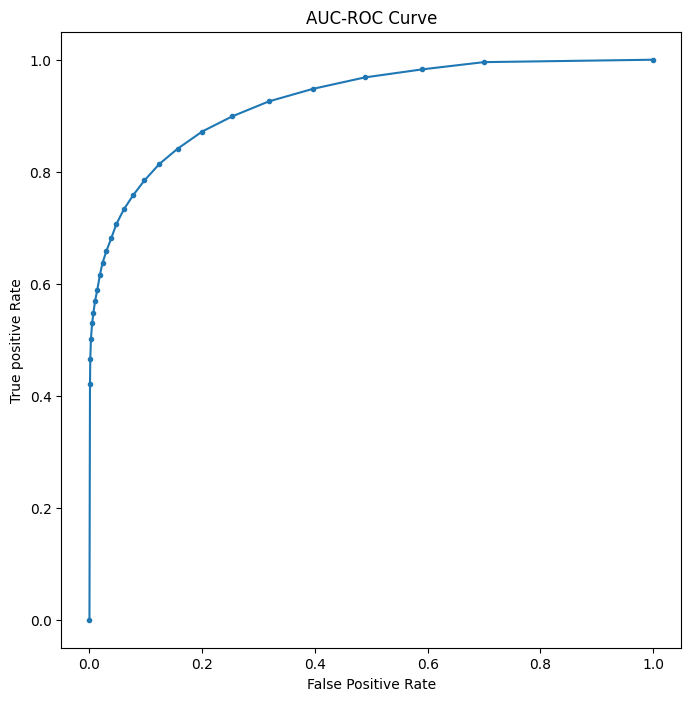

In [134]:
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("AUC-ROC Curve")

In [135]:
kn_f=f1_score(y_test, kn_p, average="macro")
kn_pr=precision_score(y_test,kn_p, average="macro")
kn_r=recall_score(y_test,kn_p, average="macro")

# 7. Naive Bayes

In [136]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [137]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [138]:
nb.fit(x_train,y_train)

MultinomialNB()

In [139]:
nb_p=nb.predict(x_test)
nb_p

array([0, 0, 1, ..., 0, 1, 1])

In [140]:
nb_c=confusion_matrix(nb_p,y_test)
nb_c

array([[14989,  4330],
       [   40,  4519]])

In [141]:

nb_ac=nb_c.diagonal().sum()/nb_c.sum()*100
nb_ac

81.6986347265265

In [142]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     19319
           1       0.51      0.99      0.67      4559

    accuracy                           0.82     23878
   macro avg       0.75      0.88      0.77     23878
weighted avg       0.90      0.82      0.83     23878



In [143]:
nb_f=f1_score(y_test, nb_p, average="macro")
nb_pr=precision_score(y_test,nb_p, average="macro")
nb_r=recall_score(y_test,nb_p, average="macro")

# Conclusion

In [144]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","KNN","Naive Bayes"] 
list2=[lg_ac,dt_ac,rf_ac,ab_ac,xg_ac,sv_ac,kn_ac,nb_ac]   
list3=[lg_pr,dt_pr,rf_pr,ab_pr,xg_pr,sv_pr,kn_pr,nb_pr]
list4=[lg_r,dt_r,rf_r,ab_r,xg_r,sv_r,kn_r,nb_r]
list5=[lg_f,dt_f,rf_f,ab_f,xg_f,sv_f,kn_f,nb_f]

In [145]:
df=pd.DataFrame({"Model Name":list1, "Accuracy":list2, "Precision":list3, "Recall":list4, "F1-Score":list5})
df

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,80.752157,0.799172,0.780552,0.787605
1,Decision Tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,100.000000,1.000000,1.000000,1.000000
3,Ada Boost,100.000000,1.000000,1.000000,1.000000
4,XG Boost,100.000000,1.000000,1.000000,1.000000
5,SVM,71.764804,0.742276,0.638547,0.637201
6,KNN,86.112740,0.871700,0.829293,0.843260
7,Naive Bayes,81.698635,0.883547,0.754009,0.773424


# Class Imbalance Treatment using Random Under Sampling

In [146]:
c_0,c_1=h_n["is_canceled"].value_counts()
c_0,c_1 #saving categorical values of target columns in variables

(75166, 44224)

In [147]:
h_0=h_n[h_n["is_canceled"]==0]
h_1=h_n[h_n["is_canceled"]==1]

In [148]:
h_0.shape,h_1.shape

((75166, 31), (44224, 31))

In [149]:
class_0under=h_0.sample(c_1)


In [150]:
class0_1=pd.concat([class_0under,h_1],axis=0)
class0_1

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
118811,0,42,2017,1,34,26,0,1,2,0.0,...,0,9.0,0,2,170.0,0,3,1,909,0
30415,1,115,2016,9,47,17,1,3,2,0.0,...,0,14.0,0,3,34.0,0,0,1,630,0
94570,0,22,2016,1,32,5,0,1,2,2.0,...,0,9.0,0,2,297.0,0,1,1,523,0
105572,0,4,2017,3,6,10,0,2,2,0.0,...,0,9.0,0,2,108.0,0,0,1,713,0
97383,0,36,2016,11,38,11,2,3,1,0.0,...,0,14.0,0,2,110.0,0,0,1,564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,0,132,2017,0,17,25,0,0,0,0.0,...,0,9.0,0,2,0.0,0,3,0,785,1
111355,0,4,2017,6,23,5,1,0,1,0.0,...,0,14.0,0,2,65.0,0,0,0,826,1
111924,0,7,2017,8,22,31,0,1,1,0.0,...,0,14.0,0,2,65.0,0,0,0,821,1
111925,0,6,2017,5,29,17,1,0,1,0.0,...,0,14.0,0,2,65.0,0,0,2,868,1


In [151]:
class0_1.is_canceled.value_counts()
#Random Under sampling balance the class distribution by randomly eliminating majority class values
#As data is having large no of rows it also helps to reduce execution time

0    44224
1    44224
Name: is_canceled, dtype: int64

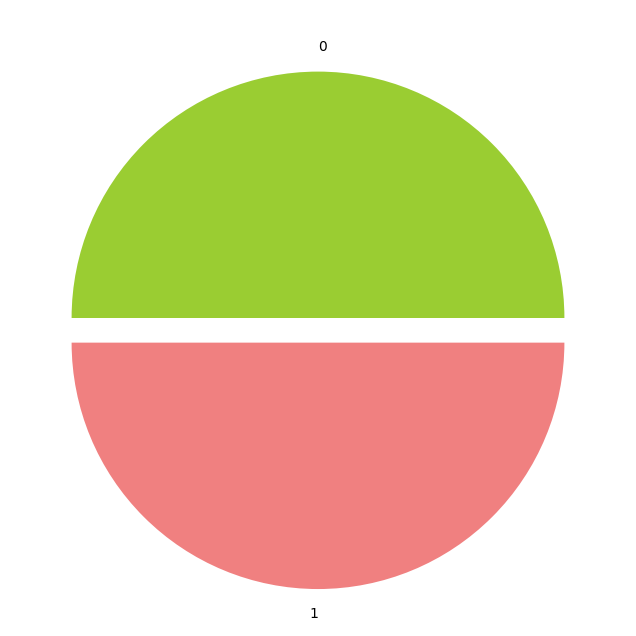

In [256]:
##after class Imbalance
size=class0_1.is_canceled.value_counts()
explode = (0, 0.1)
colors = ['yellowgreen', 'lightcoral']
plt.pie(size, explode=explode, labels=labels, colors=colors)
plt.show()

# Outlier Treatment

In [152]:
class0_1.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_canceled'],
      dtype='object')

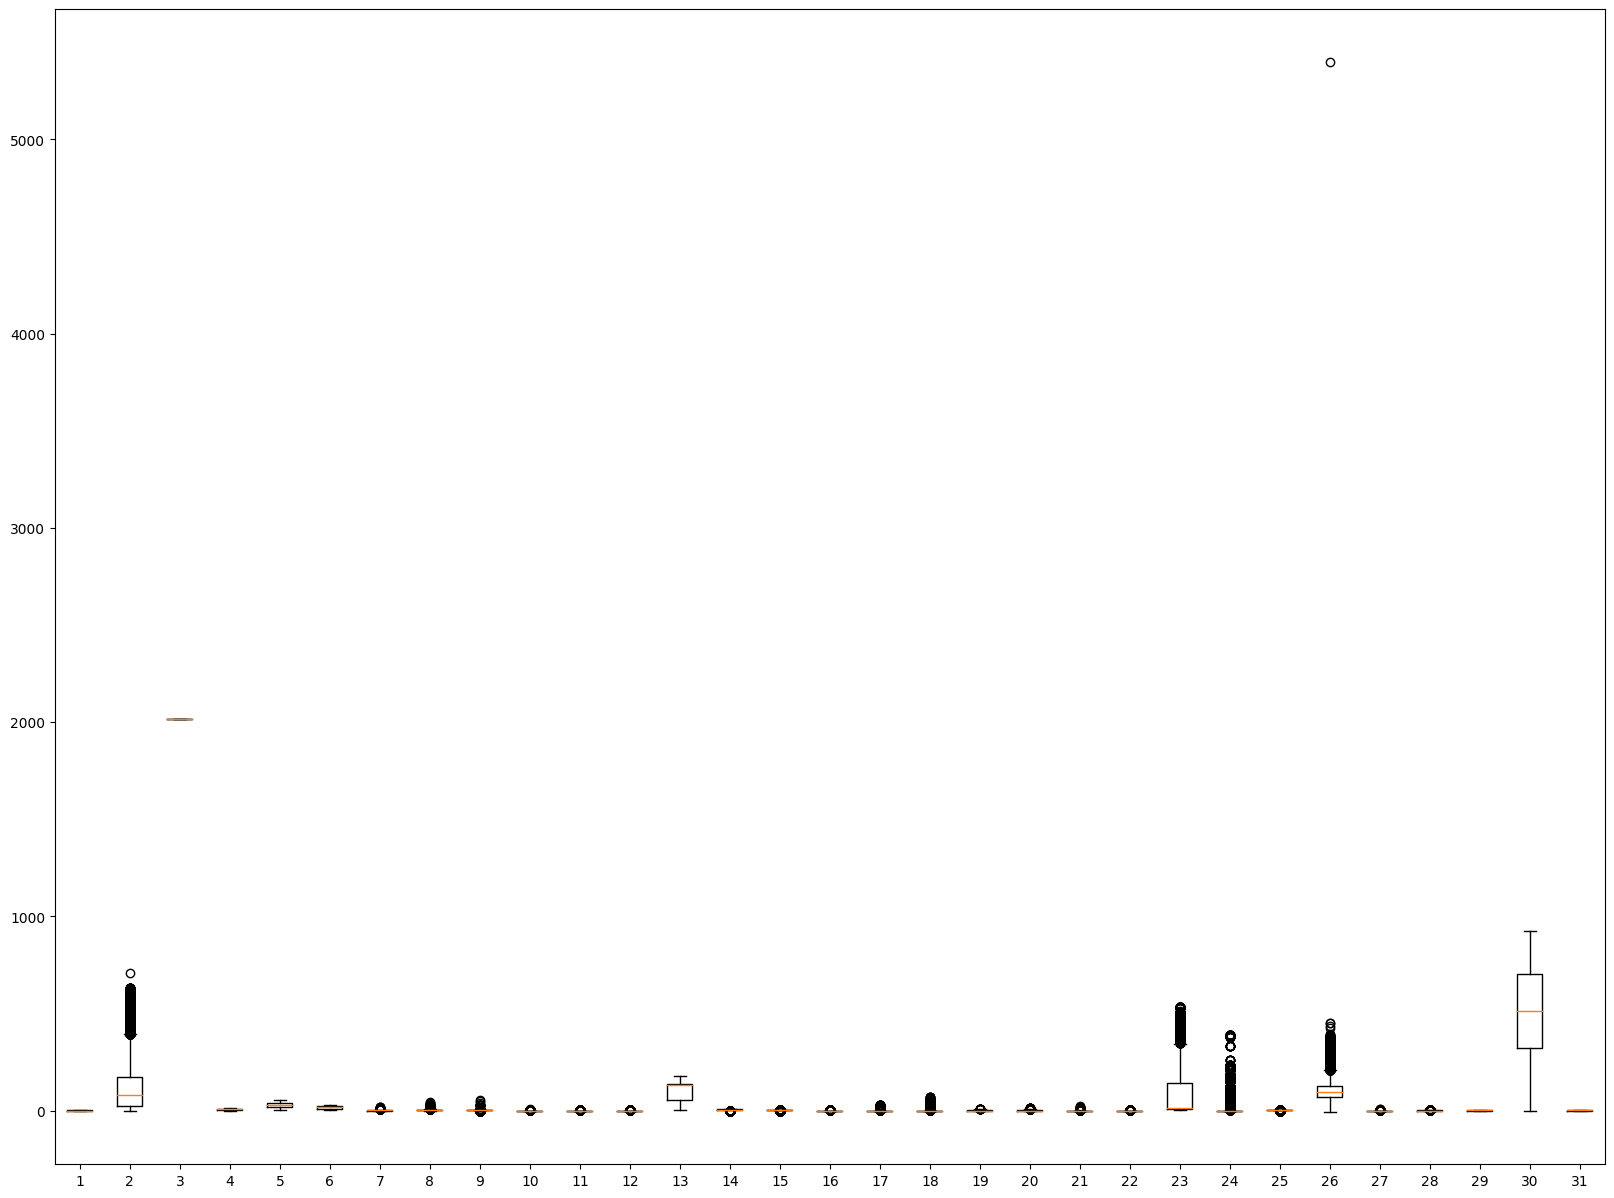

In [153]:
plt.figure(figsize=(20,15))
plt.boxplot(class0_1)
plt.show()

# lead_time

In [154]:
class0_1.lead_time.value_counts()     

0      3932
1      2183
2      1272
3      1143
4      1060
       ... 
435       1
375       1
371       1
400       1
380       1
Name: lead_time, Length: 476, dtype: int64

<Axes: >

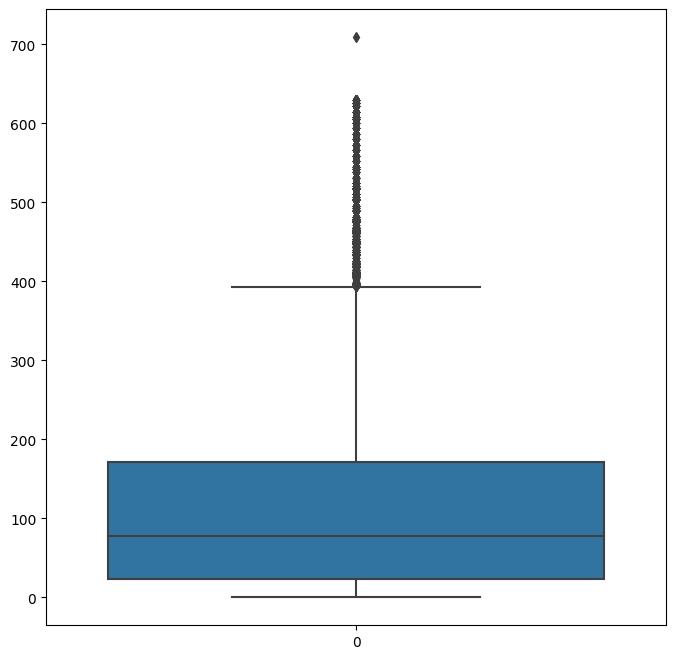

In [155]:
sns.boxplot(class0_1.lead_time)

<Axes: xlabel='lead_time', ylabel='Density'>

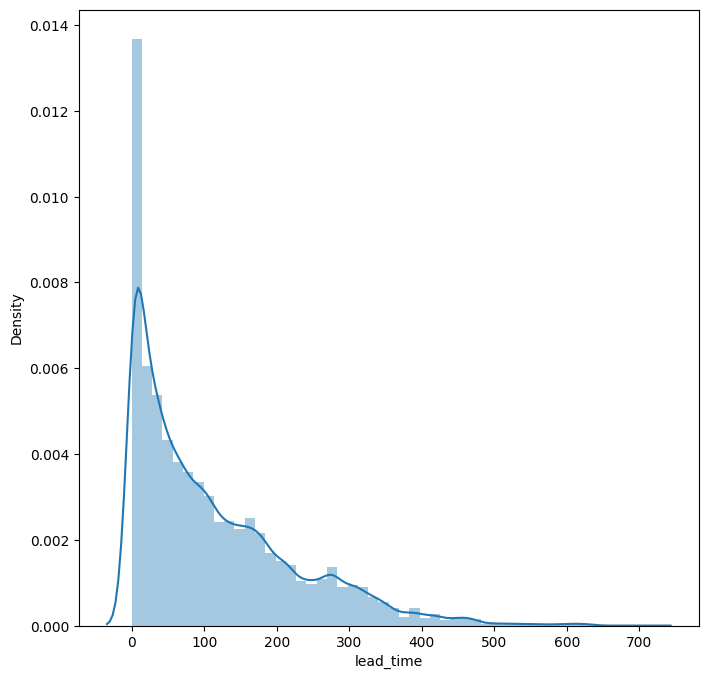

In [156]:
sns.distplot(class0_1.lead_time)

In [157]:
class0_1.lead_time.describe()

count    88448.000000
mean       112.321952
std        110.543518
min          0.000000
25%         23.000000
50%         78.000000
75%        171.000000
max        709.000000
Name: lead_time, dtype: float64

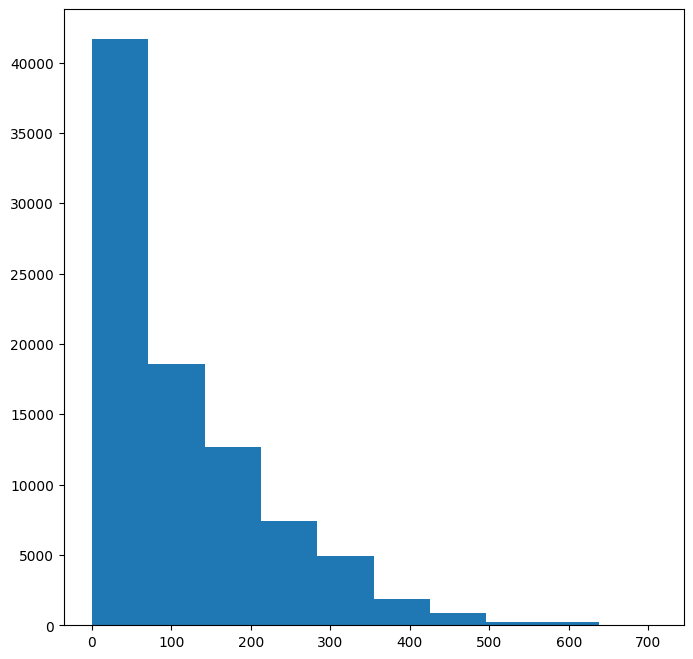

In [158]:
plt.hist(class0_1.lead_time)
plt.show()

In [159]:
iqr=class0_1.lead_time.quantile(0.75)-class0_1.lead_time.quantile(0.25)
iqr #As the data is skewed iqr technique is used

148.0

In [160]:
lb=class0_1["lead_time"].quantile(0.25)-(iqr*3)
ub=class0_1["lead_time"].quantile(0.75)+(iqr*3)
print(lb,ub)

-421.0 615.0


In [161]:
class0_1.loc[class0_1["lead_time"]>615,"lead_time"]=615 #outliers are above the maxima therefore upper boundary value is used

# agent

In [162]:
class0_1.agent.value_counts()

9.0      24318
14.0     13663
240.0    10398
1.0       6424
6.0       2359
         ...  
197.0        1
289.0        1
265.0        1
299.0        1
444.0        1
Name: agent, Length: 310, dtype: int64

<Axes: >

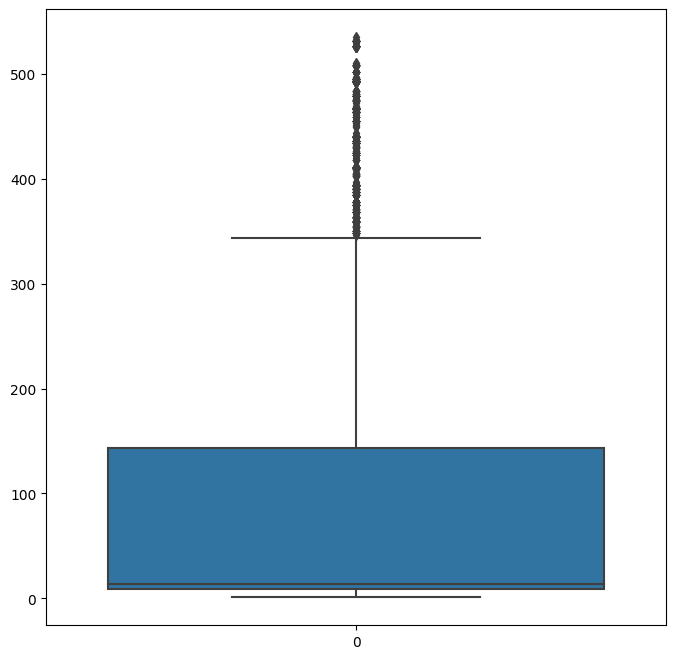

In [163]:
sns.boxplot(class0_1.agent)

<Axes: xlabel='agent', ylabel='Density'>

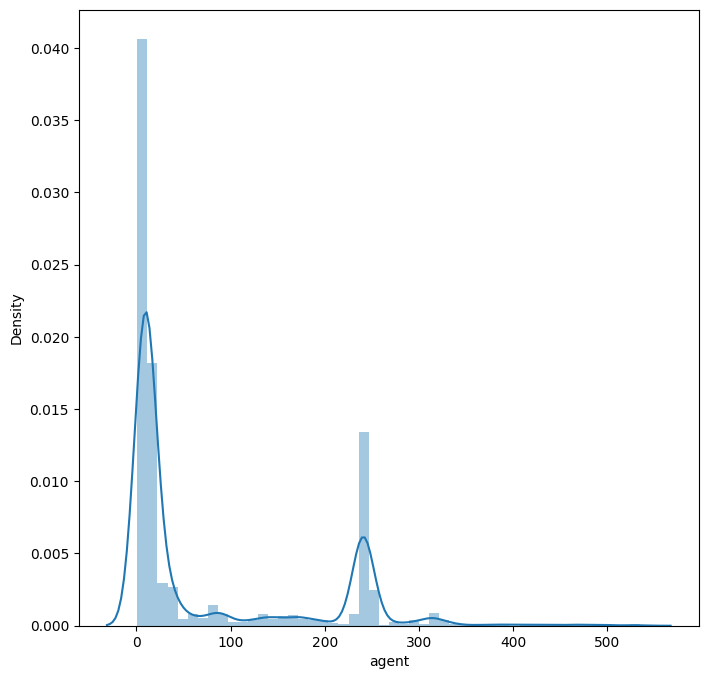

In [164]:
sns.distplot(class0_1.agent)

In [165]:
class0_1.agent.describe()

count    88448.000000
mean        75.264246
std        104.978090
min          1.000000
25%          9.000000
50%         14.000000
75%        143.000000
max        535.000000
Name: agent, dtype: float64

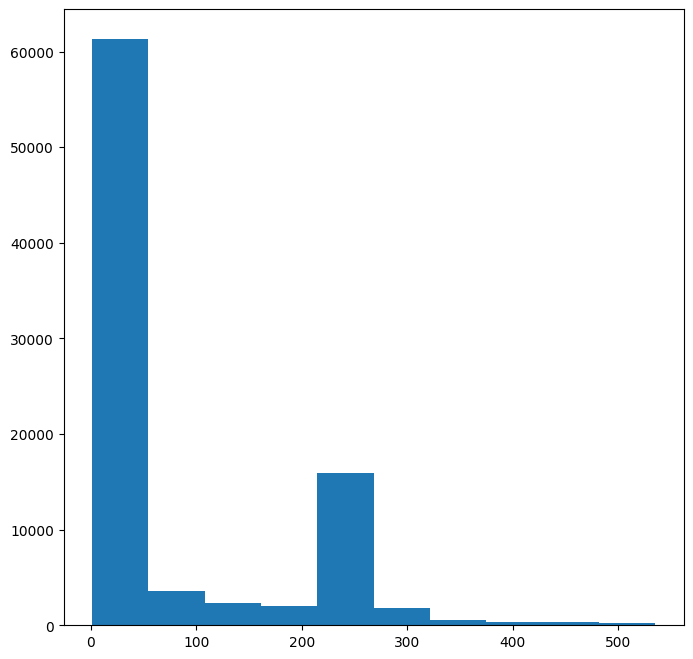

In [166]:
plt.hist(class0_1.agent)
plt.show()

In [167]:
iqr=class0_1.agent.quantile(0.75)-class0_1.agent.quantile(0.25)
iqr

134.0

In [168]:
lb=class0_1["agent"].quantile(0.25)-(iqr*3)
ub=class0_1["agent"].quantile(0.75)+(iqr*3)
print(lb,ub)

-393.0 545.0


In [169]:
class0_1.loc[class0_1["agent"]>545,"agent"]=545

# adr

In [170]:
class0_1.adr.value_counts()

62.00     3461
75.00     2076
90.00     2072
65.00     1720
80.00     1539
          ... 
147.73       1
298.71       1
132.16       1
73.86        1
56.80        1
Name: adr, Length: 7420, dtype: int64

<Axes: >

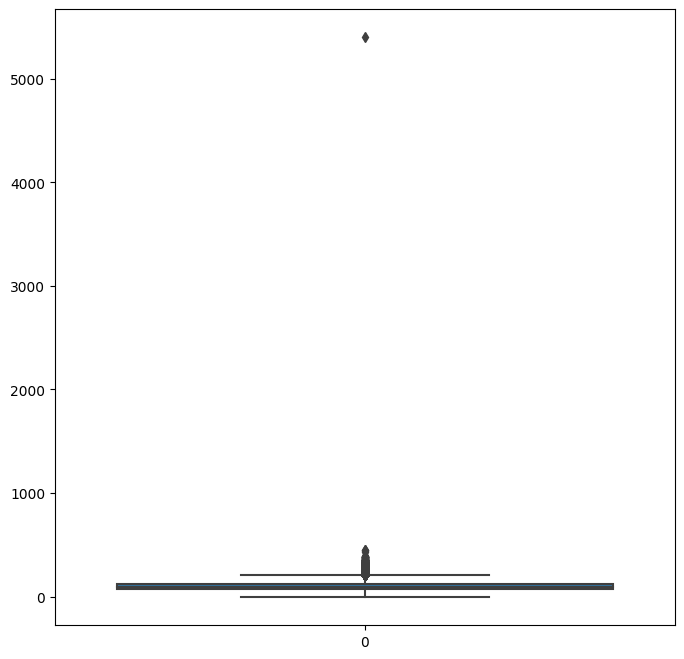

In [171]:
sns.boxplot(class0_1.adr)

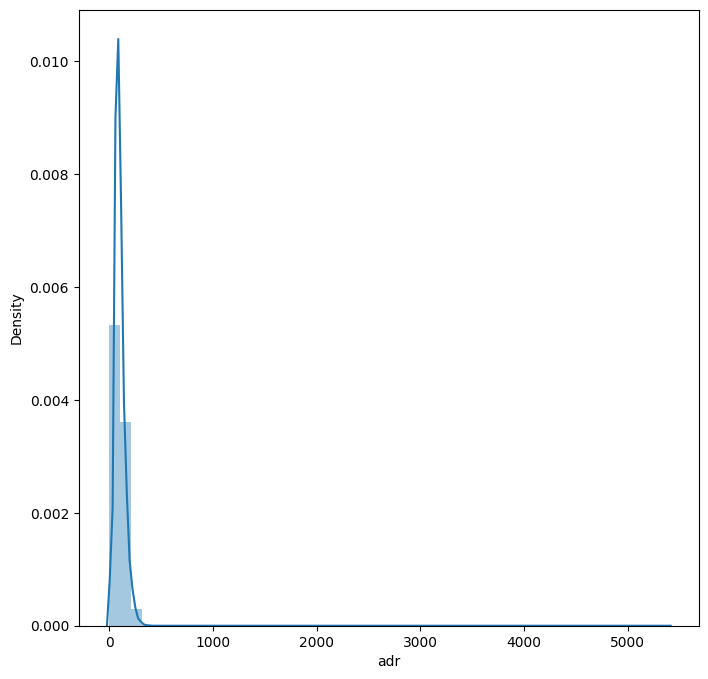

In [172]:
sns.distplot(class0_1.adr)
plt.show()

In [173]:
class0_1.adr.describe()

count    88448.000000
mean       102.447661
std         50.978502
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max       5400.000000
Name: adr, dtype: float64

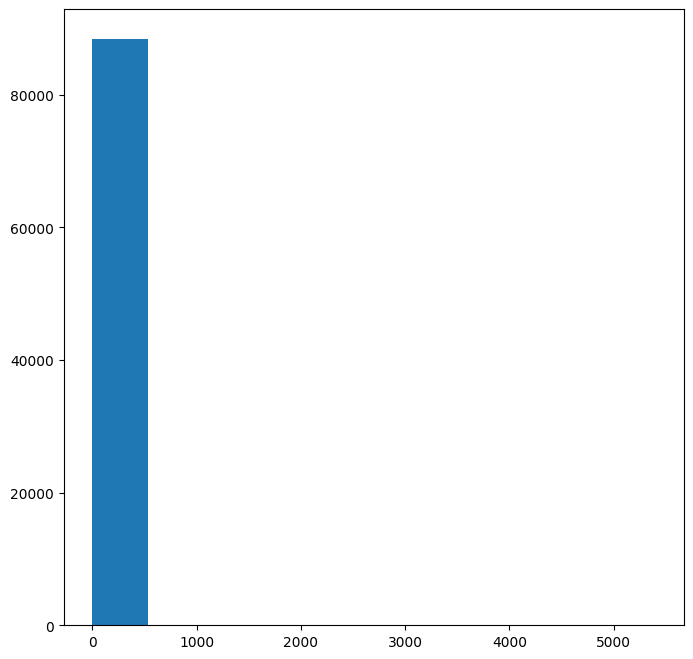

In [174]:
plt.hist(class0_1.adr)
plt.show()

In [175]:
iqr=class0_1.adr.quantile(0.75)-class0_1.adr.quantile(0.25)
iqr

56.0

In [176]:
lb=class0_1["adr"].quantile(0.25)-(iqr*3)
ub=class0_1["adr"].quantile(0.75)+(iqr*3)
print(lb,ub)

-98.0 294.0


In [177]:
class0_1.loc[class0_1["adr"]>294,"adr"]=294

# Data Transformation

# lead_time

In [178]:
class0_1.loc[class0_1["lead_time"]==0] # zero values are present therefore using square root transformation

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled
95871,0,0,2016,1,35,24,0,1,2,1.0,...,0,89.0,0,2,136.44,0,1,1,542,0
20756,1,0,2016,3,7,8,1,0,2,0.0,...,0,14.0,0,2,65.00,0,0,1,344,0
19466,1,0,2015,2,52,20,1,0,2,0.0,...,0,240.0,0,2,48.00,0,0,1,294,0
45619,0,0,2015,9,46,14,0,0,2,0.0,...,0,9.0,0,0,0.00,0,2,1,257,0
20558,1,0,2016,7,11,8,0,1,1,0.0,...,0,14.0,0,2,40.00,0,0,1,373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98809,0,0,2016,2,51,12,1,0,2,0.0,...,0,341.0,0,2,77.00,0,2,0,651,1
98810,0,0,2016,2,51,12,1,0,2,0.0,...,0,341.0,0,2,0.00,0,2,0,651,1
101930,0,0,2017,6,26,29,0,1,2,0.0,...,0,45.0,0,2,0.00,0,0,0,850,1
105909,0,0,2017,0,16,18,0,1,1,0.0,...,0,14.0,0,2,0.00,0,2,0,778,1


<Axes: xlabel='lead_time', ylabel='Density'>

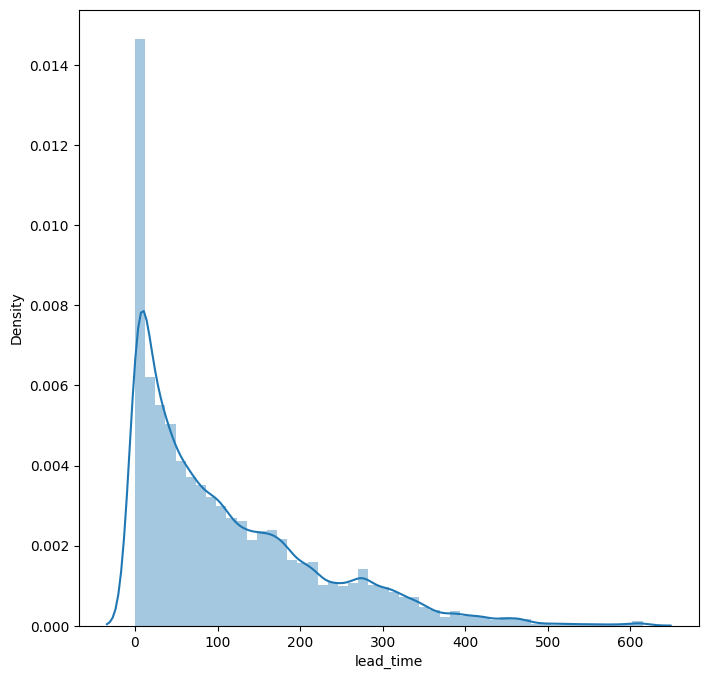

In [179]:
sns.distplot(class0_1.lead_time)

In [180]:
class0_1.lead_time.skew()

1.2693211451311952

In [181]:
class0_1.lead_time=np.sqrt(class0_1.lead_time) #As zero values are present in column therefore square root method is used

In [182]:
class0_1.lead_time.skew()

0.23716855048988353

<Axes: xlabel='lead_time', ylabel='Density'>

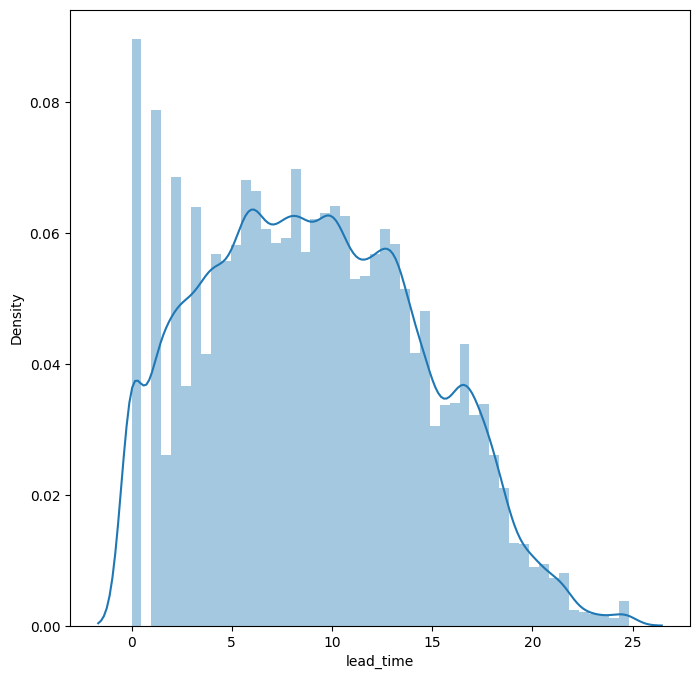

In [183]:
sns.distplot(class0_1.lead_time)

# agent

In [184]:
class0_1.loc[class0_1["agent"]==0] # no zero values are present therefore using log transformation

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled


<Axes: xlabel='agent', ylabel='Density'>

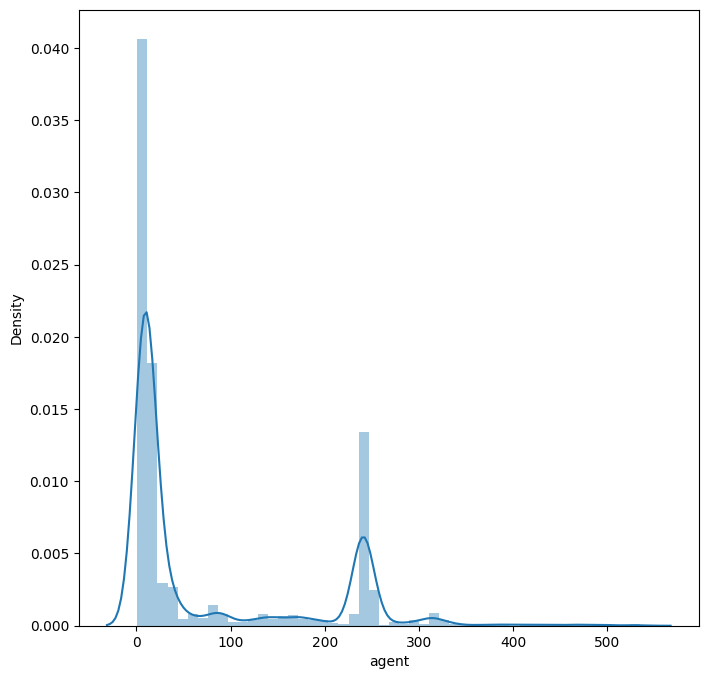

In [185]:
sns.distplot(class0_1.agent)

In [186]:
class0_1.agent.skew()

1.3365526563279195

In [187]:
class0_1.agent=np.log(class0_1.agent)

In [188]:
class0_1.agent.skew()

0.16923154595391846

In [189]:
#sns.distplot(class0_1.agent)

In [190]:
class0_1.skew() # range of skewness is -1 to 1

hotel                              0.781547
lead_time                          0.237169
arrival_date_year                 -0.239726
arrival_date_month                -0.047683
arrival_date_week_number          -0.009946
arrival_date_day_of_month          0.000785
stays_in_weekend_nights            1.345021
stays_in_week_nights               2.819894
adults                            22.204845
children                           4.122716
babies                            12.484951
meal                               1.587188
country                           -0.304001
market_segment                    -1.003935
distribution_channel              -2.048877
is_repeated_guest                  5.755939
previous_cancellations            21.696295
previous_bookings_not_canceled    25.785454
reserved_room_type                 1.502538
assigned_room_type                 1.250560
booking_changes                    6.025942
deposit_type                       1.857581
agent                           

# Splitting the data

In [191]:
u_x=class0_1.iloc[:,0:-1]
u_y=class0_1.iloc[:,-1]

In [192]:
u_x

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
118811,0,6.480741,2017,1,34,26,0,1,2,0.0,...,2,0,2.197225,0,2,170.0,0,3,1,909
30415,1,10.723805,2016,9,47,17,1,3,2,0.0,...,0,0,2.639057,0,3,34.0,0,0,1,630
94570,0,4.690416,2016,1,32,5,0,1,2,2.0,...,0,0,2.197225,0,2,294.0,0,1,1,523
105572,0,2.000000,2017,3,6,10,0,2,2,0.0,...,1,0,2.197225,0,2,108.0,0,0,1,713
97383,0,6.000000,2016,11,38,11,2,3,1,0.0,...,0,0,2.639057,0,2,110.0,0,0,1,564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,0,11.489125,2017,0,17,25,0,0,0,0.0,...,1,0,2.197225,0,2,0.0,0,3,0,785
111355,0,2.000000,2017,6,23,5,1,0,1,0.0,...,0,0,2.639057,0,2,65.0,0,0,0,826
111924,0,2.645751,2017,8,22,31,0,1,1,0.0,...,0,0,2.639057,0,2,65.0,0,0,0,821
111925,0,2.449490,2017,5,29,17,1,0,1,0.0,...,0,0,2.639057,0,2,65.0,0,0,2,868


In [193]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=100)

In [194]:
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape

((70758, 30), (17690, 30), (70758,), (17690,))



# Feature Selection

# Random forest

In [195]:
rf.fit(u_x_train,u_y_train)

RandomForestClassifier()

In [196]:
rf.feature_importances_

array([1.72690590e-03, 2.83941828e-02, 3.88907567e-03, 1.90582989e-03,
       3.93431781e-03, 2.57819285e-03, 1.61866122e-03, 2.77613914e-03,
       1.14999405e-03, 4.90271486e-04, 6.53788439e-05, 1.05065226e-03,
       3.95868068e-02, 2.15876771e-02, 2.67320003e-03, 9.71825530e-04,
       9.92218861e-03, 1.20410012e-03, 1.55895996e-03, 5.18850404e-03,
       6.49315241e-03, 5.69123379e-02, 1.28395511e-02, 9.69618256e-05,
       5.41861824e-03, 6.20671412e-03, 1.25557386e-02, 1.57642553e-02,
       7.33994773e-01, 1.74450334e-02])

In [197]:
df1=pd.DataFrame({"Importances":list(rf.feature_importances_),"Columns":list(x)})
df1

,Importances,Columns
0,0.001727,hotel
1,0.028394,lead_time
2,0.003889,arrival_date_year
3,0.001906,arrival_date_month
4,0.003934,arrival_date_week_number
5,0.002578,arrival_date_day_of_month
6,0.001619,stays_in_weekend_nights
7,0.002776,stays_in_week_nights
8,0.001150,adults
9,0.000490,children


In [198]:
# All features are important

# Model building after treating Outliers


# 1. Logistic Regression

In [199]:
lg.fit(u_x_train,u_y_train)

LogisticRegression()

In [200]:
lg_p1=lg.predict(u_x_test)
lg_p1

array([0, 1, 1, ..., 1, 1, 0])

In [201]:
lg_c1=confusion_matrix(lg_p1,u_y_test)
lg_c1

array([[7016, 1735],
       [1836, 7103]])

In [202]:
lg_ac1=lg_c1.diagonal().sum()/lg_c1.sum()*100
lg_ac1

79.81345392877331

In [203]:
print(classification_report(lg_p1,u_y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      8751
           1       0.80      0.79      0.80      8939

    accuracy                           0.80     17690
   macro avg       0.80      0.80      0.80     17690
weighted avg       0.80      0.80      0.80     17690



In [204]:
lg_f1=f1_score(u_y_test, lg_p1, average="macro")
lg_pr1=precision_score(u_y_test,lg_p1, average="macro")
lg_r1=recall_score(u_y_test,lg_p1, average="macro")

# 2. Decision Tree

In [205]:
dt.fit(u_x_train,u_y_train)

DecisionTreeClassifier()

In [206]:
dt_p1=dt.predict(u_x_test)
dt_p1

array([0, 1, 1, ..., 1, 1, 0])

In [207]:
dt_c1=confusion_matrix(dt_p1,u_y_test)
dt_c1

array([[8852,    0],
       [   0, 8838]])

In [208]:
dt_ac1=dt_c1.diagonal().sum()/dt_c1.sum()*100
dt_ac1

100.0

In [209]:
print(classification_report(dt_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8852
           1       1.00      1.00      1.00      8838

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [210]:
dt_f1=f1_score(u_y_test, dt_p1, average="macro")
dt_pr1=precision_score(u_y_test,dt_p1, average="macro")
dt_r1=recall_score(u_y_test,dt_p1, average="macro")

# 3. Random Forest

In [211]:
rf.fit(u_x_train,u_y_train)

RandomForestClassifier()

In [212]:
rf_p1=rf.predict(u_x_test)
rf_p1

array([0, 1, 1, ..., 1, 1, 0])

In [213]:
rf_c1=confusion_matrix(rf_p1,u_y_test)
rf_c1

array([[8852,    2],
       [   0, 8836]])

In [214]:
rf_ac1=rf_c1.diagonal().sum()/rf_c1.sum()*100
rf_ac1

99.98869417750142

In [215]:
print(classification_report(rf_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8854
           1       1.00      1.00      1.00      8836

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [216]:
rf_f1=f1_score(u_y_test, rf_p1, average="macro")
rf_pr1=precision_score(u_y_test,rf_p1, average="macro")
rf_r1=recall_score(u_y_test,rf_p1, average="macro")

# 4. Boosting
# 4.1 Ada Boost

In [217]:
ab.fit(u_x_train,u_y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=2)

In [218]:
ab_p1=ab.predict(u_x_test)
ab_p1

array([0, 1, 1, ..., 1, 1, 0])

In [219]:
ab_c1=confusion_matrix(ab_p1,u_y_test)
ab_c1

array([[8852,    0],
       [   0, 8838]])

In [220]:
ab_ac1=ab_c1.diagonal().sum()/ab_c1.sum()*100
ab_ac1

100.0

In [221]:
print(classification_report(ab_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8852
           1       1.00      1.00      1.00      8838

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [222]:
ab_f1=f1_score(u_y_test, ab_p1, average="macro")
ab_pr1=precision_score(u_y_test,ab_p1, average="macro")
ab_r1=recall_score(u_y_test,ab_p1, average="macro")

# 4.2 XG Boost

In [223]:
xg.fit(u_x_train,u_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [224]:
xg_p1=xg.predict(u_x_test)
xg_p1

array([0, 1, 1, ..., 1, 1, 0])

In [225]:
xg_c1=confusion_matrix(xg_p1,u_y_test)
xg_c1

array([[8852,    0],
       [   0, 8838]])

In [226]:
xg_ac1=xg_c1.diagonal().sum()/xg_c1.sum()*100
xg_ac1

100.0

In [227]:
print(classification_report(xg_p1,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8852
           1       1.00      1.00      1.00      8838

    accuracy                           1.00     17690
   macro avg       1.00      1.00      1.00     17690
weighted avg       1.00      1.00      1.00     17690



In [228]:
xg_f1=f1_score(u_y_test, xg_p1, average="macro")
xg_pr1=precision_score(u_y_test,xg_p1, average="macro")
xg_r1=recall_score(u_y_test,xg_p1, average="macro")

# 5. SVM

In [229]:
sv.fit(u_x_train,u_y_train)

SVC()

In [230]:
sv_p1=sv.predict(u_x_test)
sv_p1

array([0, 1, 1, ..., 1, 1, 0])

In [231]:
sv_c1=confusion_matrix(sv_p1,u_y_test)
sv_c1

array([[5719, 2742],
       [3133, 6096]])

In [232]:
sv_ac1=sv_c1.diagonal().sum()/sv_c1.sum()*100
sv_ac1

66.78914641040136

In [233]:
print(classification_report(sv_p1,u_y_test))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      8461
           1       0.69      0.66      0.67      9229

    accuracy                           0.67     17690
   macro avg       0.67      0.67      0.67     17690
weighted avg       0.67      0.67      0.67     17690



In [234]:
sv_f1=f1_score(u_y_test, sv_p1, average="macro")
sv_pr1=precision_score(u_y_test,sv_p1, average="macro")
sv_r1=recall_score(u_y_test,sv_p1, average="macro")

# 6. KNN

In [235]:
kn.fit(u_x_train,u_y_train)

KNeighborsClassifier(n_neighbors=24)

In [236]:
kn_p1=kn.predict(u_x_test)
kn_p1

array([0, 1, 1, ..., 1, 1, 0])

In [237]:
kn_c1=confusion_matrix(kn_p1,u_y_test)
kn_c1

array([[8380, 1873],
       [ 472, 6965]])

In [238]:
kn_ac1=kn_c1.diagonal().sum()/kn_c1.sum()*100
kn_ac1

86.743923120407

In [239]:
print(classification_report(kn_p1,u_y_test))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     10253
           1       0.79      0.94      0.86      7437

    accuracy                           0.87     17690
   macro avg       0.87      0.88      0.87     17690
weighted avg       0.88      0.87      0.87     17690



In [240]:
kn_f1=f1_score(u_y_test, kn_p1, average="macro")
kn_pr1=precision_score(u_y_test,kn_p1, average="macro")
kn_r1=recall_score(u_y_test,kn_p1, average="macro")

# 7. Naive Bayes

In [241]:
#as some columns in data contain negetive values and minmaxscaler takes positive value so we have used this syntax
from sklearn.preprocessing import MinMaxScaler #fixed import
scaler = MinMaxScaler()
u_x_train = scaler.fit_transform(u_x_train)  
u_x_test = scaler.transform(u_x_test) 

In [242]:
nb.fit(u_x_train,u_y_train) 

MultinomialNB()

In [243]:
nb_p1=nb.predict(u_x_test)
nb_p1 

array([0, 1, 1, ..., 1, 1, 0])

In [244]:
nb_c1=confusion_matrix(nb_p1,u_y_test)
nb_c1 

array([[8822, 1087],
       [  30, 7751]])

In [245]:
nb_ac1=nb_c1.diagonal().sum()/nb_c1.sum()*100
nb_ac1 

93.68569813453928

In [246]:
print(classification_report(nb_p1,u_y_test)) 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      9909
           1       0.88      1.00      0.93      7781

    accuracy                           0.94     17690
   macro avg       0.94      0.94      0.94     17690
weighted avg       0.94      0.94      0.94     17690



In [247]:
roc_n=roc_auc_score(nb_p1,u_y_test)
roc_n

0.9432231001639402

In [248]:
nb1_prob=nb.predict_proba(u_x_test)

In [249]:
df_n=pd.DataFrame(nb1_prob)
df_n

,0,1
0,0.883184,0.116816
1,0.065797,0.934203
2,0.044456,0.955544
3,0.048525,0.951475
4,0.779529,0.220471
...,...,...
17685,0.399163,0.600837
17686,0.044456,0.955544
17687,0.045029,0.954971
17688,0.046489,0.953511


In [250]:
fpr,tpr,threshold=roc_curve(u_y_test,df_n.iloc[:,1])

Text(0.5, 1.0, 'AUC-ROC Curve')

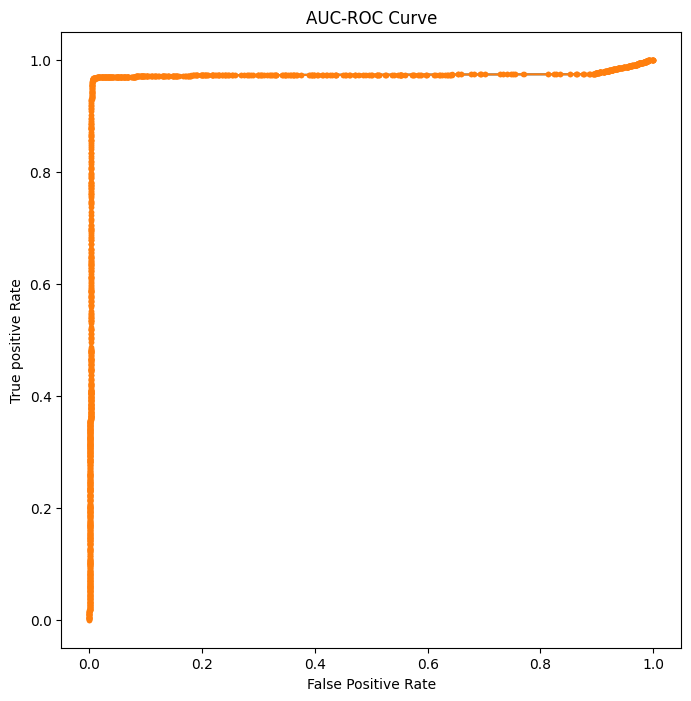

In [251]:
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("AUC-ROC Curve")

In [252]:
nb_f1=f1_score(u_y_test, nb_p1, average="macro")
nb_pr1=precision_score(u_y_test,nb_p1, average="macro")
nb_r1=recall_score(u_y_test,nb_p1, average="macro")

# Conclusion

In [253]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","KNN","Naive Bayes"] 
list2=[lg_ac1,dt_ac1,rf_ac1,ab_ac1,xg_ac1,sv_ac1,kn_ac1,nb_ac1] 
list3=[lg_pr1,dt_pr1,rf_pr1,ab_pr1,xg_pr1,sv_pr1,kn_pr1,nb_pr1]
list4=[lg_r1,dt_r1,rf_r1,ab_r1,xg_r1,sv_r1,kn_r1,nb_r1]
list5=[lg_f1,dt_f1,rf_f1,ab_f1,xg_f1,sv_f1,kn_f1,nb_f1]

In [254]:

df1=pd.DataFrame({"Model Name":list1, "Accuracy":list2, "Precision":list3, "Recall":list4, "F1-Score":list5})
df1 

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,79.813454,0.798172,0.798139,0.798130
1,Decision Tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,99.988694,0.999887,0.999887,0.999887
3,Ada Boost,100.000000,1.000000,1.000000,1.000000
4,XG Boost,100.000000,1.000000,1.000000,1.000000
5,SVM,66.789146,0.668226,0.667909,0.667741
6,KNN,86.743923,0.876928,0.867376,0.866586
7,Naive Bayes,93.685698,0.943223,0.936810,0.936625


In [255]:
df

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,80.752157,0.799172,0.780552,0.787605
1,Decision Tree,100.000000,1.000000,1.000000,1.000000
2,Random Forest,100.000000,1.000000,1.000000,1.000000
3,Ada Boost,100.000000,1.000000,1.000000,1.000000
4,XG Boost,100.000000,1.000000,1.000000,1.000000
5,SVM,71.764804,0.742276,0.638547,0.637201
6,KNN,86.112740,0.871700,0.829293,0.843260
7,Naive Bayes,81.698635,0.883547,0.754009,0.773424


#Conclusion
By comparing df and df1 then "Decision Tree", "Random Forest", "Ada Boost", "XG Boost" these models are over fitted in both the conditions(before and after treating outliers).So here, Naive Bayes is best fitted model.